In [1]:
import json
import numpy as np

#### Create key_list

In [15]:
KEY_DICT = {
        'sale_contract': {"replace_key": ["contract_no", 
                                        "contract_date", 
                                        "seller_company", 
                                        "seller_address", 
                                        "buyer_company",
                                        "specifications",
                                        "quantity",
                                        "unit_price",
                                        "total_value",
                                        "time_of_shipment",],
                        "label": ["contract_no", 
                                        "contract_date", 
                                        "seller_company", 
                                        "seller_address", 
                                        "buyer_company",
                                        "quantity",
                                        "unit_price",
                                        "total_value",
                                        "time_of_shipment",]
                         } ,
        'bill_of_lading': {"replace_key": ["bill_id", 
                                        "company1.1", "company1.2", "address1", 
                                        "company2", "address2",
                                        "code1", "code2", "code3",
                                        "place_of_receipt", "place_of_delivery",
                                        "ocean_vessel", "voyage_no", "flag",
                                        "port_of_loading", "port_of_discharge",
                                        "con_no1", "con_no2", "con_no3", "con_no4", "con_no5",
                                        "bale_quantity", "con_num1", "con_num2", "con_num3", "con_num4", "con_num5",
                                        "con_mark1", "con_mark2", "con_mark3", "con_mark4", "con_mark5",
                                        "gross_weight", "measurement", "con_quantity", "text_con_quantity", 
                                        "country1", "tel1", "fax1", "name_contact1", "ein_tax1",
                                        "country2", "tel2", "fax2", "name_contact2", "gmail2",
                                        "freight_prepaid_at", "place_of_issue", "date"
                                        ],
                        "label": ["bill_id", 
                                        "company1", "address1", 
                                        "company2", "address2",
                                        "place_of_receipt", "place_of_delivery",
                                        "ocean_vessel", "voyage_no", "flag",
                                        "port_of_loading", "port_of_discharge",
                                        "container_no",  "container_num","container_mark",
                                        "gross_weight", "measurement", "container_quantity", "bale_quantity",
                                        "freight_prepaid_at", "place_of_issue", "date"
                                        ],
                          } ,
        'commercial_invoice':  {"replace_key": ["seller_company", "seller_address", "seller_tel", "seller_fax",
                                                "buyer_company", "buyer_address",
                                                "invoice_id", "invoice_date",
                                                "product", "quantity", "unit_price", "amount",
                                                "contract_no",
                                                "loading_port", "discharge_port",
                                                "sailing_date"],
                                "label": ["seller_company", "seller_address", "seller_tel", "seller_fax",
                                                "buyer_company", "buyer_address",
                                                "invoice_id", "invoice_date",
                                                "product", "quantity", "unit_price", "amount",],
                                },
        'packing_list':  {"replace_key": ["seller_company", "seller_address", "seller_tel", "seller_fax",
                                        "buyer_company", "buyer_address", "buyer_tel", "buyer_fax",
                                        "invoice_id", "invoice_date", "product",
                                        "container_num1", "container_num2", "container_num3", "container_num4", "container_num5", "container_num6", "container_num7", "container_num8", "container_num9",
                                        "g_weight1", "g_weight2", "g_weight3", "g_weight4", "g_weight5", "g_weight6", "g_weight7", "g_weight8", "g_weight9",
                                        "n_weight1", "n_weight2", "n_weight3", "n_weight4", "n_weight5", "n_weight6", "n_weight7", "n_weight8", "n_weight9",
                                        "bale1", "bale2", "bale3", "bale4", "bale5", "bale6", "bale7", "bale8", "bale9",
                                        "contract_no",
                                        "total_g", "total_n", "total_bale", "container_quantity"],
                                "label": ["seller_company", "seller_address", "seller_tel", "seller_fax",
                                        "buyer_company", "buyer_address", "buyer_tel", "buyer_fax",
                                        "invoice_id", "invoice_date",
                                        "product", "container_num", "g_weight", "n_weight", "bale", "contract_no",
                                        "total_g", "total_n", "total_bale", "container_quantity"],
                                } ,
        "score_table": {"replace_key" : ["last_name", "first_name", "birth", "province", "score", "grade"],
                        "label" :       ["last_name", "first_name", "birth", "province", "score", "grade"],}
        }

with open("/home/phung/AnhHung/data_gen/GenFromOdt/key_dict.json", "w", encoding="utf-8") as f:
    json.dump(KEY_DICT, f, ensure_ascii=False, indent="\t")


In [ ]:
with open("./key_dict.json", "r", encoding="utf-8") as f:
    data=json.load(f)
data

In [ ]:
with open("./key_dict2.json", "r", encoding="utf-8") as f:
    data=json.load(f)
data

#### Load yml

In [60]:
import yaml

def load_yaml(file_path):
    with open(file_path, 'r') as file:
        data = yaml.safe_load(file)
    return data

# Ví dụ sử dụng
file_path = './config/kie.yml'  # Đường dẫn đến tệp YAML
data_dict = load_yaml(file_path)



In [62]:
data_dict['label_list'] is None

True

#### Edit txt files

In [18]:
import random
txt_file = "./data/vietnamese_name_2_word.txt"

with open(txt_file, "r") as f:
    words = [x.replace("\n", "") for x in f.readlines()]
len(words)

5075

In [17]:
new_words = []
for word in words:
    if word in new_words:
        continue
    new_words.append(word)
len(new_words)

453

'Khôi Ðồng Huân Chương Khai'

In [10]:

with open("./data/vietnamese_name_1_word.txt", "w", encoding= "utf-8") as f:
    for x in new_words:
        f.write(x)
        f.write("\n")
    # words = [x.replace("\n", "") for x in f.readlines()]

#### Gendata

In [2]:
import random
def generate_code_string(code_temp):
    letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    numbers = '0123456789'

    string_value =[]
    for char in code_temp:
        if char == "T":
            string_value.append(random.choice(letters))
        elif char == "N":
            string_value.append(random.choice(numbers))
        else:
            string_value.append(char)
    code_string = ''.join(string_value)
    return code_string

generate_code_string("TNNT")

'C28Q'

In [3]:
from faker import Faker
import copy
fake = Faker()


In [530]:
type(round(random.randint(1,5), 1))

int

In [527]:
fake.street_address() + ", " + fake.city() + ", " + fake.country()

'126 Randolph Path, Cruzview, United States Virgin Islands'

In [241]:
def gen_add_info(add_temp, max_len=20, upper=True):
    fake = Faker()
    new_add = add_temp
    while new_add == add_temp or len(new_add) > max_len:
        new_add = add_temp
        if "(address)" in add_temp:
            if upper:
                new_add = new_add.replace("(address)", fake.address().upper().replace("\n"," "))
            else:
                new_add = new_add.replace("(address)", fake.address().replace("\n"," "))
        if "(country)" in add_temp:
            if upper:
                new_add = new_add.replace("(country)", fake.country().upper())
            else:
                new_add = new_add.replace("(country)", fake.country())
        if "(city)" in add_temp:
            if upper:
                new_add = new_add.replace("(city)", fake.city().upper())
            else:
                new_add = new_add.replace("(city)", fake.city())
        if "(company)" in add_temp:
            if upper:
                new_add = new_add.replace("(company)", fake.company().upper())
            else:
                new_add = new_add.replace("(company)", fake.company())
        if "(name)" in add_temp:
            if upper:
                new_add = new_add.replace("(name)", fake.name().upper())
            else:
                new_add = new_add.replace("(name)", fake.name())
        if "(email)" in add_temp:
            if upper:
                new_add = new_add.replace("(email)", fake.email().upper())
            else:
                new_add = new_add.replace("(email)", fake.email())
    return new_add
print(gen_add_info("(address)", max_len = 70, upper = False))

226 Anita Wells Suite 355 Bishopport, CA 77896


In [248]:
words = np.loadtxt("../SynthText/dataset-generator/words.txt", dtype=np.dtype(str), delimiter="\n")
with open("../SynthText/dataset-generator/words.txt", 'r') as file:
    words = np.array(file.read().splitlines(), dtype=np.dtype(str))
words

array(['a', 'AAA', 'AAAS', ..., 'Zulu', 'Zurich', 'zygote'], dtype='<U22')

In [207]:
import inflect

def convert_number_to_text(number):
    p = inflect.engine()
    text = p.number_to_words(number).upper()
    return text

# Example usage
number = 22
text = convert_number_to_text(number)
print(type(text))


<class 'str'>


'455,306.000'

In [335]:
def multiply_strings(x, y):
    # Convert strings to numerical values
    x_value = float(x.replace(',', ''))
    y_value = float(y.replace(',', ''))
    
    # Perform multiplication
    result = x_value * y_value
    
    # Format the result back into string format
    result_string = "{:,.2f}".format(result)
    
    return result_string

multiply_strings("{:,.3f}".format(random.randint(1, 1000)), "{:,.2f}".format(random.randint(1, 500)))

'344,871.00'

In [303]:
def generate_random_words(min_len = 5, max_len = 50):
    fake = Faker()
    words_list = [fake.word() for i in range(random.randint(1, 100))]
    words = " ".join(words_list)
    while len(words) < min_len or len(words) > max_len:
        words_list = [fake.word() for i in range(random.randint(1, 100))]
        words = " ".join(words_list)
    return words
generate_random_words(min_len = 5, max_len = 50)

'appear address tell treat return I'

In [390]:
x = round(random.uniform(1, 500), 3)
"{:,.3f}".format(x)

'164.580'

In [16]:
from datetime import datetime, timedelta

start_date = datetime(2000, 1, 1)
end_date = datetime(2005, 1, 1)

random_date = start_date + random.random() * (end_date - start_date)
date_string = random_date.strftime("%d/%m/%Y")
# print((start_date + random.random() * (end_date - start_date)).strftime("%d/%m/%Y"))
date_string

'28/11/2001'

In [17]:
len('Hoang Lien Son')

14

In [13]:
import pandas as pd

# Specify the path to the XLS file
file_path = "./data/address_list.csv"

# Load the XLS file into a DataFrame
df = pd.read_csv(file_path)
province_list = []
for x in df['Province']:
    if x not in province_list:
        province_list.append(x)
len(province_list)  

63

### Table from pdf

In [13]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
from src.image_convert import bytes2pillow
import fitz
import PyPDF2
import camelot
import copy
import pandas as pd
import numpy as np

In [14]:
#Show img
def plot_img(img,size = (10,10)):
    plt.figure(figsize=size)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

#Vẽ bounding box
def bounding_box(img, x1, y1, x2, y2, line_width = 2):
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), line_width)
    return img

def draw_rectangle(image, x1, y1, x2, y2, line_width = 2):
    # Create an ImageDraw object
    draw = ImageDraw.Draw(image)

    # Draw the rectangle
    rectangle = [(x1, y1), (x2, y2)]
    draw.rectangle(rectangle, outline='red', width=line_width)

    return image


def find_table_positions(pdf_file_path):
    table_positions = []
    
    with open(pdf_file_path, 'rb') as file:
        reader = PyPDF2.PdfFileReader(file)
        
        for page_number in range(reader.numPages):
            page = reader.getPage(page_number)
            content = page.extractText()
            
            # Perform table detection logic here
            # You can use regular expressions or other techniques to identify table patterns
            
            # Example: Check if the page contains the word 'Table'
            if 'Table' in content:
                table_positions.append(page_number)
    
    return table_positions

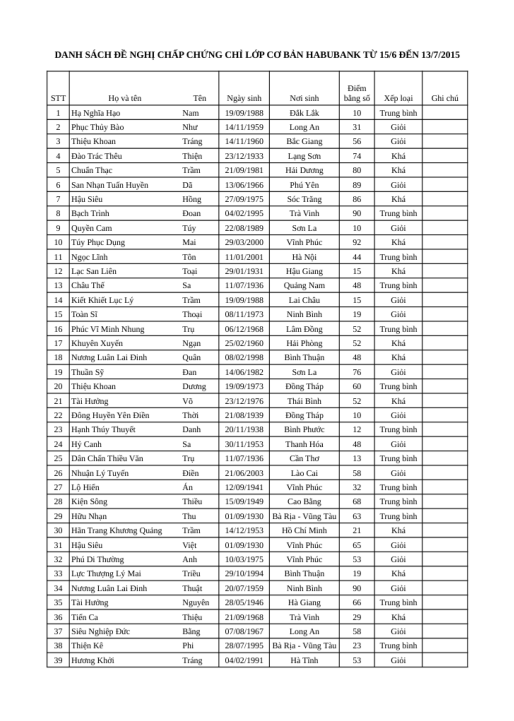

In [94]:

# pdf_path = "/home/phung/AnhHung/data_gen/GenFromOdt/output/packing_list.pdf"
# page_1 = "/home/phung/AnhHung/data_gen/GenFromOdt/output/packing_list.jpg"

pdf_path = "/home/phung/AnhHung/data_gen/GenFromOdt/output/temp.pdf"
page_1 = "/home/phung/AnhHung/data_gen/GenFromOdt/output/page01.jpg"
page_2 = "/home/phung/AnhHung/data_gen/GenFromOdt/output/page02.jpg"

# image1 = cv2.cvtColor(cv2.imread(page_1), cv2.COLOR_BGR2RGB)
# image2 = cv2.cvtColor(cv2.imread(page_2), cv2.COLOR_BGR2RGB)

image1 = Image.open(page_1)
image2 = Image.open(page_2)


pdf_doc = fitz.open(pdf_path)
for j, page in enumerate(pdf_doc):
    pixmap = page.get_pixmap()
    image = bytes2pillow(pixmap.tobytes())

    plot_img(image, (13, 13))
    break

In [95]:
tables = camelot.read_pdf(pdf_path, flavor = "lattice", pages='all')
print("Total tables extracted:", tables.n)

Total tables extracted: 2


In [118]:
def check_same_length(list_of_lists):
    length = len(list_of_lists[0])
    return all(len(lst) == length for lst in list_of_lists[1:])

def merge_boxes(box_list):
    # Convert the list to a NumPy array
    box_array = np.array(box_list)

    # Calculate the minimum and maximum values
    min_x1 = np.min(box_array[:, 0])
    max_x2 = np.max(box_array[:, 2])
    min_y1 = np.min(box_array[:, 1])
    max_y2 = np.max(box_array[:, 3])

    return [min_x1, min_y1, max_x2, max_y2]

def extract_table(table, w, h):
    lines = table.cells
    rows = []
    cells = []
    for i, boxes in enumerate(lines):
        new_line = []
        # print(len(cell))
        for j, box in enumerate(boxes):
            true_box = [int(box.x1), int(h-box.y1), int(box.x2), int(h-box.y2)]
            new_line.append(true_box)
            cells.append(true_box)
            # break
        rows.append(new_line)

    
    if check_same_length(rows):
        columns = [[] for i in range(len(rows[0]))]
        for row in rows:
            for i, cell in enumerate(row):
                columns[i].append(cell)
    else:
        columns = []


    return {
        "row" : [merge_boxes(row) for row in rows],
        "cell" : cells,
        "table" : merge_boxes(cells),
        "column" : [merge_boxes(column) for column in columns],
    }

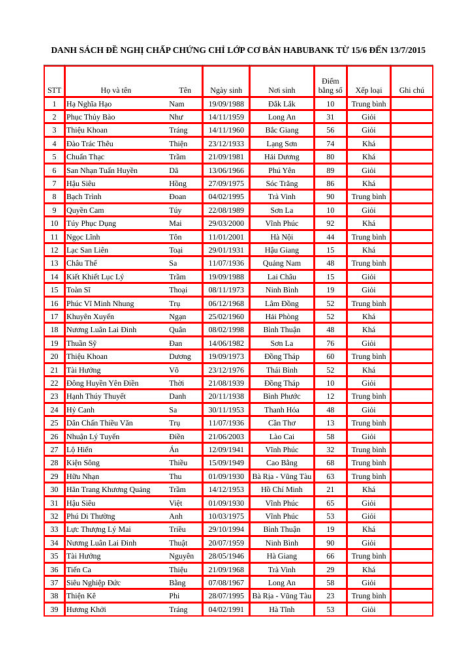

In [102]:
image_copy = image1.copy()
w, h = image_copy.size

lines = tables[0].cells

rows = []
cells = []

for i, boxes in enumerate(lines):

    new_line = []
    # print(len(cell))
    for j, box in enumerate(boxes):
        
        image_copy = draw_rectangle(image_copy, int(box.x1), int(h-box.y1), int(box.x2), int(h-box.y2), line_width = 2)
        true_box = [int(box.x1), int(h-box.y1), int(box.x2), int(h-box.y2)]
        new_line.append(true_box)
        cells.append(true_box)
        # break
    rows.append(new_line)
    # break
    

plot_img(image_copy, (12, 12))

In [121]:
image_copy = image1.copy()

w, h = image_copy.size

res = extract_table(tables[0], w, h)
res

{'row': [[56, 139, 652, 91],
  [56, 159, 652, 139],
  [56, 179, 652, 159],
  [56, 200, 652, 179],
  [56, 220, 652, 200],
  [56, 241, 652, 220],
  [56, 261, 652, 241],
  [56, 281, 652, 261],
  [56, 302, 652, 281],
  [56, 322, 652, 302],
  [56, 343, 652, 322],
  [56, 363, 652, 343],
  [56, 383, 652, 363],
  [56, 404, 652, 383],
  [56, 424, 652, 404],
  [56, 445, 652, 424],
  [56, 465, 652, 445],
  [56, 485, 652, 465],
  [56, 506, 652, 485],
  [56, 526, 652, 506],
  [56, 547, 652, 526],
  [56, 567, 652, 547],
  [56, 587, 652, 567],
  [56, 608, 652, 587],
  [56, 628, 652, 608],
  [56, 649, 652, 628],
  [56, 669, 652, 649],
  [56, 689, 652, 669],
  [56, 710, 652, 689],
  [56, 730, 652, 710],
  [56, 751, 652, 730],
  [56, 771, 652, 751],
  [56, 791, 652, 771],
  [56, 812, 652, 791],
  [56, 832, 652, 812],
  [56, 853, 652, 832],
  [56, 873, 652, 853],
  [56, 893, 652, 873],
  [56, 914, 652, 893],
  [56, 935, 652, 914]],
 'cell': [[56, 139, 88, 91],
  [88, 139, 299, 91],
  [299, 139, 371, 91],

In [103]:
rows

[[[56, 139, 88, 91],
  [88, 139, 299, 91],
  [299, 139, 371, 91],
  [371, 139, 470, 91],
  [470, 139, 520, 91],
  [520, 139, 587, 91],
  [587, 139, 652, 91]],
 [[56, 159, 88, 139],
  [88, 159, 299, 139],
  [299, 159, 371, 139],
  [371, 159, 470, 139],
  [470, 159, 520, 139],
  [520, 159, 587, 139],
  [587, 159, 652, 139]],
 [[56, 179, 88, 159],
  [88, 179, 299, 159],
  [299, 179, 371, 159],
  [371, 179, 470, 159],
  [470, 179, 520, 159],
  [520, 179, 587, 159],
  [587, 179, 652, 159]],
 [[56, 200, 88, 179],
  [88, 200, 299, 179],
  [299, 200, 371, 179],
  [371, 200, 470, 179],
  [470, 200, 520, 179],
  [520, 200, 587, 179],
  [587, 200, 652, 179]],
 [[56, 220, 88, 200],
  [88, 220, 299, 200],
  [299, 220, 371, 200],
  [371, 220, 470, 200],
  [470, 220, 520, 200],
  [520, 220, 587, 200],
  [587, 220, 652, 200]],
 [[56, 241, 88, 220],
  [88, 241, 299, 220],
  [299, 241, 371, 220],
  [371, 241, 470, 220],
  [470, 241, 520, 220],
  [520, 241, 587, 220],
  [587, 241, 652, 220]],
 [[56, 261,

/tmp/ipykernel_2991986/741030849.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[1], kind='grid').show()


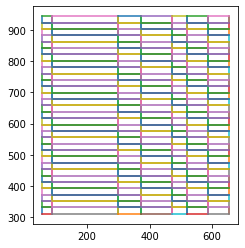

In [45]:
camelot.plot(tables[1], kind='grid').show()

In [87]:
df = tables[0].df
df.to_csv("./output/temp.csv")

#### Image to Pdf

In [1]:
from img2table.ocr import TesseractOCR
from img2table.document import Image

/home/phung/.local/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/phung/.local/lib/python3.9/site-packages/paddle/vision/transforms/functional_pil.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': Image.NEAREST,
/home/phung/.local/lib/python3.9/site-packages/paddle/vision/transforms/functional_pil.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': Image.BILINEAR,
/home/phung/.local/lib/python3.9/site-packages/paddle/vision/transforms/functional_pil.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': Image.BICUBIC,
/hom

In [8]:

image_path = "/home/phung/AnhHung/temp/table/4.png"

# image = Image(image_path, 
#               detect_rotation=False)
# Instantiation of OCR
ocr = TesseractOCR(n_threads=1, lang="vie")

# Instantiation of document, either an image or a PDF
doc = Image(image_path)

# Table extraction
extracted_tables = doc.extract_tables(ocr=ocr,
                                      implicit_rows=False,
                                      borderless_tables=False,
                                      min_confidence=50)

tesseract 4.1.1
 leptonica-1.79.0
  libgif 5.1.9 : libjpeg 6b (libjpeg-turbo 2.0.6) : libpng 1.6.37 : libtiff 4.2.0 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.4.3 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [12]:
bbox = extracted_tables[0].bbox
x1 = int(bbox.x1)
y1 = int(bbox.y1)
x2 = int(bbox.x2)
y2 = int(bbox.y2)

image1 = Image.open(image_path)


The code supports creating data for the text detection problem and key information extraction from the odt file.

Steps to generate data:

- Create an .odt file (can use libre office): the text is in the form of \$(key1), \$(key2),... can be replaced
- Generate replacement information: key_dict includes key_name:{replace_key:[key1, key2, ...], label:[...]}
- Setting the config file yml
- Run the file odt_to_kie.py or odt_to_labelme.py

Birth data:
- Text detection: includes image and json file loaded by Labelme tool
- Key information extraction: json file loaded by tool https://github.com/ndgnuh/relation-tagger

Load odt &rarr; Replace key &rarr; Save as pdf &rarr; Load pdf &rarr; Read texts, boxes &rarr; save as Text Detection or KIE